# FEATURE ENGINEERING PROJECT    -  "HRMAGIC"

“HRMagic” is one of the known name in this hiring space having a huge client base spread acroos different sectors like IT, manufacturing, fianance etc. over the years they have realized the pain organizations face with respect to the hiring process.

“HRMagic” team has decided to proceed with a prototype using which they want to find out if a model can be built to predict the liklihood of a candidate joining the company. if the liklihood is high, then only company will go ahead and offer the jobs to the candidates. 


# (A) collect / extract data
The first step in building a model is to collect or extract data on the dependent variable and independent variables from different datasets provided. data collection / extraction is time consuming and expensive process.
You as team of three or four students you have merge the candidate data provided based on the common factors. 
simultanesuoyly you need to make search what are the attributes those are taken into consideration while carrying out recruitment activity. 
The research will provide you more insight on determining the useful attributes present in the dataset or give pointers to the varibles that needs to be dervied. make list of such potential attribtues. 
outcome of this step will be merged data set containing the 200 candidates data. 
document all your efforts appropriately in the jupyter notebooks with description and code. 
the weigtage for this task will be 5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn import preprocessing  
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder

In [2]:
df1 = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Application data')

In [3]:
df2 = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Candidate Data')

In [4]:
df3 = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Interview Data ')

In [5]:
df2 = df2.drop(labels= "Candidate ID",axis = 1)

In [6]:
df3 = df3.drop(labels= "Candidate ID",axis = 1)

In [7]:
frames = [df1, df2, df3]

In [8]:
#keep the original data in data_original.
data_original = frames 

In [9]:
data = pd.concat(frames,axis = 1)

In [10]:
#keep the original data in data_original.
data_original = data

In [11]:
data_original.shape

(201, 37)

In [12]:
col_rename = {'Candidate ID':'candidate_id', 'Date of Application':'data_of_application', 'Date of Interview':'date_of_interview',
       'Date of Job Offer':'date_of_job_offer', 'Date of Offer extension':'date_of_offer_extension', 'Date of Joining':'date_of_joining',
       'Offered band':'offered_band', 'Offered Salary':'offered_salary', 'Percentage hike offered (CTC)':'percentage_hike_offered_ctc',
       'Joining bonus amount':'joining_bonus_amount', 'LOB':'lob', 'Joining location':'joining_location',
       'Candidate relocation status':'candidate_relocation_status', 'Acceptance status':'acceptance_status', 'Notice period':'notice_period',
       'Current CTC':'current_ctc', 'Current gross salary':'current_gross_salary', 'Current organization':'current_organization',
       'Highest Educational Degree':'highest_educational_degree', 'Total experience':'total_experience', 'Relevant experience':'relevant_experience',
       'Year of graduation':'year_of_graduation', 'Expected CTC':'expected_ctc', 'Percentage hike (CTC) expected ':'percentage_hike_expected_ctc',
       'Gender':'gender', 'Candidate source':'candidate_source', 'DOB':'dob', 'Location':'location',
       'Number of precious jobs':'number_of_precious_jobs', 'Written Test Date':'written_test_date', 'Interview rounds':'interview_rounds',
       'Date of first Interview':'date_of_first_interview', 'Date of last Interview':'date_of_last_interview', 'Interview types':'interview_types',
       'Interview Types2':'interview_types2', 'First interview duration':'first_interview_duration',
       'Last interaction duration':'last_interaction_duration'}
 
data = data.rename(columns = col_rename)

In [13]:
print(data.columns)

Index(['candidate_id', 'data_of_application', 'date_of_interview',
       'date_of_job_offer', 'date_of_offer_extension', 'date_of_joining',
       'offered_band', 'offered_salary', 'percentage_hike_offered_ctc',
       'joining_bonus_amount', 'lob', 'joining_location',
       'candidate_relocation_status', 'acceptance_status', 'notice_period',
       'current_ctc', 'current_gross_salary', 'current_organization',
       'highest_educational_degree', 'total_experience', 'relevant_experience',
       'year_of_graduation', 'expected_ctc', 'percentage_hike_expected_ctc',
       'gender', 'candidate_source', 'dob', 'location',
       'number_of_precious_jobs', 'written_test_date', 'interview_rounds',
       'date_of_first_interview', 'date_of_last_interview', 'interview_types',
       'interview_types2', 'first_interview_duration',
       'last_interaction_duration'],
      dtype='object')


# (B) pre-process data
beafore the model is built, it is essential to ensure the quality of the data for issues such as reliability, completeness, usefullness, accuracy, missing data and outliers. 
data imputation techniques may be used to deal with missing data. use of descriptive stat and visuzlaization may be used to identify the existence of outliers and variability in the dataset. Many new variables can be derived and alos used in model building. categorical data has to be pre-processed using dummy VARIABELS, before it is used to model building. 
you have to cleanse your datasets to remove all such daunting isssues. 
narrate all the issues which you encounter during this exercise clearly with appropriate explanation and code. 
the weigtage for this task will be 7 marks.

In [14]:
data.columns

Index(['candidate_id', 'data_of_application', 'date_of_interview',
       'date_of_job_offer', 'date_of_offer_extension', 'date_of_joining',
       'offered_band', 'offered_salary', 'percentage_hike_offered_ctc',
       'joining_bonus_amount', 'lob', 'joining_location',
       'candidate_relocation_status', 'acceptance_status', 'notice_period',
       'current_ctc', 'current_gross_salary', 'current_organization',
       'highest_educational_degree', 'total_experience', 'relevant_experience',
       'year_of_graduation', 'expected_ctc', 'percentage_hike_expected_ctc',
       'gender', 'candidate_source', 'dob', 'location',
       'number_of_precious_jobs', 'written_test_date', 'interview_rounds',
       'date_of_first_interview', 'date_of_last_interview', 'interview_types',
       'interview_types2', 'first_interview_duration',
       'last_interaction_duration'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   candidate_id                  200 non-null    object        
 1   data_of_application           200 non-null    datetime64[ns]
 2   date_of_interview             200 non-null    datetime64[ns]
 3   date_of_job_offer             200 non-null    datetime64[ns]
 4   date_of_offer_extension       200 non-null    datetime64[ns]
 5   date_of_joining               200 non-null    datetime64[ns]
 6   offered_band                  200 non-null    object        
 7   offered_salary                200 non-null    float64       
 8   percentage_hike_offered_ctc   200 non-null    float64       
 9   joining_bonus_amount          200 non-null    float64       
 10  lob                           200 non-null    object        
 11  joining_location              20

In [16]:
data.shape

(201, 37)

In [17]:
data.head(10)

,candidate_id,data_of_application,date_of_interview,date_of_job_offer,date_of_offer_extension,date_of_joining,offered_band,offered_salary,percentage_hike_offered_ctc,joining_bonus_amount,...,location,number_of_precious_jobs,written_test_date,interview_rounds,date_of_first_interview,date_of_last_interview,interview_types,interview_types2,first_interview_duration,last_interaction_duration
0,C1,2019-08-28,2020-06-12,2020-06-22,2020-06-29,2020-07-14,B2,1.383755e+06,0.190383,58122.28125,...,Kolkata,2.0,2020-05-29,4.0,2020-06-03,2020-06-12,General,Online,40.0,25.0
1,C2,2019-11-28,2020-06-08,2020-06-18,2020-06-25,2020-07-10,B4,2.976590e+06,0.332342,111705.13125,...,Pune,4.0,2020-05-31,2.0,2020-06-05,2020-06-08,Managerial,FaceToFace,40.0,40.0
2,C3,2019-08-11,2020-05-26,2020-06-05,2020-06-12,2020-07-12,B0,7.416631e+05,0.271345,29168.43750,...,Chennai,1.0,2020-05-15,3.0,2020-05-20,2020-05-26,Technical,Online,45.0,60.0
3,C4,2019-08-18,2020-05-15,2020-05-25,2020-06-01,2020-07-31,C6,4.079724e+06,0.273813,160138.23750,...,Hyderabad,6.0,2020-05-10,1.0,2020-05-15,2020-05-15,Technical,Written,40.0,40.0
4,C5,2019-09-06,2020-01-25,2020-02-04,2020-02-11,2020-02-26,B5,3.340936e+06,0.289619,129531.88125,...,Hyderabad,5.0,2020-01-11,4.0,2020-01-16,2020-01-25,Technical,Online,15.0,25.0
5,C6,2019-10-08,2020-02-27,2020-03-08,2020-03-15,2020-04-14,C6,4.373292e+06,0.338593,163354.05000,...,Bangaluru,6.0,2020-02-22,1.0,2020-02-27,2020-02-27,Managerial,Online,40.0,40.0
6,C7,2019-07-31,2020-04-29,2020-05-09,2020-05-16,2020-06-30,B3,2.706252e+06,0.396790,96873.97500,...,Kolkata,4.0,2020-04-18,3.0,2020-04-23,2020-04-29,Technical,FaceToFace,30.0,60.0
7,C8,2019-09-13,2020-03-31,2020-04-10,2020-04-17,2020-06-16,B0,5.569521e+05,0.293796,21523.95000,...,Chennai,1.0,2020-03-23,2.0,2020-03-28,2020-03-31,Managerial,Written,15.0,60.0
8,C9,2019-12-24,2020-06-26,2020-07-06,2020-07-13,2020-08-12,B5,2.668414e+06,0.152236,115792.87500,...,Kolkata,5.0,2020-06-21,1.0,2020-06-26,2020-06-26,Technical,FaceToFace,30.0,30.0
9,C10,2019-10-03,2020-04-04,2020-04-14,2020-04-21,2020-05-06,B4,2.683620e+06,0.240235,108190.01250,...,Hyderabad,4.0,2020-03-24,3.0,2020-03-29,2020-04-04,Technical,FaceToFace,20.0,30.0


In [18]:
data.tail(20)

,candidate_id,data_of_application,date_of_interview,date_of_job_offer,date_of_offer_extension,date_of_joining,offered_band,offered_salary,percentage_hike_offered_ctc,joining_bonus_amount,...,location,number_of_precious_jobs,written_test_date,interview_rounds,date_of_first_interview,date_of_last_interview,interview_types,interview_types2,first_interview_duration,last_interaction_duration
181,C182,2019-09-12,2020-04-02,2020-04-12,2020-04-19,2020-05-19,B5,3.827474e+06,0.404441,136263.20625,...,Gurugram,5.0,2020-03-25,2.0,2020-03-30,2020-04-02,General,Online,40.0,30.0
182,C183,2019-11-06,2020-02-12,2020-02-22,2020-02-29,2020-04-14,B4,2.597407e+06,0.282081,101296.51875,...,Noida,4.0,2020-01-29,4.0,2020-02-03,2020-02-12,Managerial,Written,45.0,25.0
183,C184,2019-10-22,2020-06-28,2020-07-08,2020-07-15,2020-07-30,B4,2.796538e+06,0.374479,101730.88125,...,Kolkata,4.0,2020-06-20,2.0,2020-06-25,2020-06-28,Technical,Written,60.0,15.0
184,C185,2019-11-28,2020-02-17,2020-02-27,2020-03-05,2020-03-20,B0,8.400276e+05,0.400690,29986.20000,...,Gurugram,1.0,2020-02-06,3.0,2020-02-11,2020-02-17,Technical,Written,40.0,30.0
185,C186,2019-09-22,2020-01-24,2020-02-03,2020-02-10,2020-03-26,B4,2.882638e+06,0.326195,108680.79375,...,Noida,4.0,2020-01-10,4.0,2020-01-15,2020-01-24,Managerial,FaceToFace,45.0,20.0
186,C187,2019-08-20,2020-06-15,2020-06-25,2020-07-02,2020-08-16,B2,1.398238e+06,0.374025,50881.10625,...,Bangaluru,2.0,2020-06-04,3.0,2020-06-09,2020-06-15,Managerial,Written,30.0,40.0
187,C188,2019-11-29,2020-06-23,2020-07-03,2020-07-10,2020-08-24,B1,1.205963e+06,0.282430,47018.64375,...,Mysore,1.0,2020-06-18,1.0,2020-06-23,2020-06-23,General,FaceToFace,15.0,15.0
188,C189,2019-11-27,2020-05-16,2020-05-26,2020-06-02,2020-07-02,B0,4.639022e+05,0.285127,18048.88125,...,Chennai,1.0,2020-05-08,2.0,2020-05-13,2020-05-16,General,Written,15.0,45.0
189,C190,2019-09-03,2020-05-22,2020-06-01,2020-06-08,2020-08-07,B1,1.024267e+06,0.352465,37866.65625,...,Mysore,2.0,2020-05-11,3.0,2020-05-16,2020-05-22,Managerial,FaceToFace,25.0,45.0
190,C191,2019-10-21,2020-01-09,2020-01-19,2020-01-26,2020-03-11,B5,2.967445e+06,0.276019,116277.46875,...,Kolkata,5.0,2020-01-01,2.0,2020-01-06,2020-01-09,Managerial,FaceToFace,25.0,15.0


In [19]:
data.dtypes

candidate_id                            object
data_of_application             datetime64[ns]
date_of_interview               datetime64[ns]
date_of_job_offer               datetime64[ns]
date_of_offer_extension         datetime64[ns]
date_of_joining                 datetime64[ns]
offered_band                            object
offered_salary                         float64
percentage_hike_offered_ctc            float64
joining_bonus_amount                   float64
lob                                     object
joining_location                        object
candidate_relocation_status             object
acceptance_status                       object
notice_period                          float64
current_ctc                            float64
current_gross_salary                   float64
current_organization                    object
highest_educational_degree              object
total_experience                       float64
relevant_experience                    float64
year_of_gradu

In [20]:
data.describe()

,offered_salary,percentage_hike_offered_ctc,joining_bonus_amount,notice_period,current_ctc,current_gross_salary,total_experience,relevant_experience,year_of_graduation,expected_ctc,percentage_hike_expected_ctc,number_of_precious_jobs,interview_rounds,first_interview_duration,last_interaction_duration
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.0000
mean,2.346565e+06,0.270672,92967.280031,31.275000,1.859346e+06,1.652752e+06,12.280000,11.052000,2007.720000,2.532500e+06,0.370672,3.575000,2.485000,35.700000,35.1250
std,1.095181e+06,0.087131,43718.606470,22.038098,8.743721e+05,7.772197e+05,5.242041,4.717837,5.242041,1.181556e+06,0.087131,1.728965,1.125214,14.397794,14.7631
min,4.609491e+05,0.109940,18048.881250,0.000000,3.609776e+05,3.208690e+05,3.000000,2.700000,2000.000000,5.000000e+05,0.209940,1.000000,1.000000,15.000000,15.0000
25%,1.396196e+06,0.194058,52955.339063,15.000000,1.059107e+06,9.414282e+05,7.750000,6.975000,2003.000000,1.500000e+06,0.294058,2.000000,1.000000,25.000000,25.0000
50%,2.414243e+06,0.275515,96949.490625,30.000000,1.938990e+06,1.723546e+06,12.000000,10.800000,2008.000000,2.600000e+06,0.375515,4.000000,3.000000,40.000000,30.0000
75%,3.317921e+06,0.340090,133375.598438,45.000000,2.667512e+06,2.371122e+06,17.000000,15.300000,2012.250000,3.600000e+06,0.440090,5.000000,3.000000,45.000000,45.0000
max,4.568679e+06,0.491772,167622.243750,60.000000,3.352445e+06,2.979951e+06,20.000000,18.000000,2017.000000,4.900000e+06,0.591772,6.000000,4.000000,60.000000,60.0000


In [21]:
#https://pbpython.com/pandas_dtypes.html
#https://thispointer.com/pandas-get-unique-values-in-single-or-multiple-columns-of-a-dataframe-in-python/


In [22]:
uniqueValues = data.nunique(dropna=False)
print("Count Unique values in each column including NaN")
print(uniqueValues)

Count Unique values in each column including NaN
candidate_id                    201
data_of_application             117
date_of_interview               131
date_of_job_offer               131
date_of_offer_extension         131
date_of_joining                 142
offered_band                      8
offered_salary                  201
percentage_hike_offered_ctc     201
joining_bonus_amount            201
lob                               4
joining_location                  6
candidate_relocation_status       3
acceptance_status                 3
notice_period                     6
current_ctc                     201
current_gross_salary            201
current_organization             16
highest_educational_degree        4
total_experience                 19
relevant_experience              19
year_of_graduation               19
expected_ctc                     45
percentage_hike_expected_ctc    201
gender                            3
candidate_source                  4
dob            

In [23]:
col_list = data.columns
#print(col_list)
for col in col_list:
   print("currently examining column ****" , col, ' ********')
   print(data[col].unique())
    


currently examining column **** candidate_id  ********
['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22' 'C23' 'C24' 'C25'
 'C26' 'C27' 'C28' 'C29' 'C30' 'C31' 'C32' 'C33' 'C34' 'C35' 'C36' 'C37'
 'C38' 'C39' 'C40' 'C41' 'C42' 'C43' 'C44' 'C45' 'C46' 'C47' 'C48' 'C49'
 'C50' 'C51' 'C52' 'C53' 'C54' 'C55' 'C56' 'C57' 'C58' 'C59' 'C60' 'C61'
 'C62' 'C63' 'C64' 'C65' 'C66' 'C67' 'C68' 'C69' 'C70' 'C71' 'C72' 'C73'
 'C74' 'C75' 'C76' 'C77' 'C78' 'C79' 'C80' 'C81' 'C82' 'C83' 'C84' 'C85'
 'C86' 'C87' 'C88' 'C89' 'C90' 'C91' 'C92' 'C93' 'C94' 'C95' 'C96' 'C97'
 'C98' 'C99' 'C100' 'C101' 'C102' 'C103' 'C104' 'C105' 'C106' 'C107'
 'C108' 'C109' 'C110' 'C111' 'C112' 'C113' 'C114' 'C115' 'C116' 'C117'
 'C118' 'C119' 'C120' 'C121' 'C122' 'C123' 'C124' 'C125' 'C126' 'C127'
 'C128' 'C129' 'C130' 'C131' 'C132' 'C133' 'C134' 'C135' 'C136' 'C137'
 'C138' 'C139' 'C140' 'C141' 'C142' 'C143' 'C144' 'C145' 'C146' 'C147'
 'C148' 'C1

In [24]:
data.columns

Index(['candidate_id', 'data_of_application', 'date_of_interview',
       'date_of_job_offer', 'date_of_offer_extension', 'date_of_joining',
       'offered_band', 'offered_salary', 'percentage_hike_offered_ctc',
       'joining_bonus_amount', 'lob', 'joining_location',
       'candidate_relocation_status', 'acceptance_status', 'notice_period',
       'current_ctc', 'current_gross_salary', 'current_organization',
       'highest_educational_degree', 'total_experience', 'relevant_experience',
       'year_of_graduation', 'expected_ctc', 'percentage_hike_expected_ctc',
       'gender', 'candidate_source', 'dob', 'location',
       'number_of_precious_jobs', 'written_test_date', 'interview_rounds',
       'date_of_first_interview', 'date_of_last_interview', 'interview_types',
       'interview_types2', 'first_interview_duration',
       'last_interaction_duration'],
      dtype='object')

In [25]:
# Change acceptance_status values to 'Joined'--> 1 and 'Offer Rejected' -->0
def value_change(x):
    if x == 'Offer Rejected': return 0
    return 1

In [26]:
data['acceptance_status'] = data['acceptance_status'].apply(lambda x: value_change(x))

In [27]:
# change float64 to float 
data['offered_salary'].astype(float)
data['percentage_hike_offered_ctc'].astype(float)
data['joining_bonus_amount'].astype(float)
data['relevant_experience'].astype(float)
data['percentage_hike_expected_ctc'].astype(float)


0      0.290383
1      0.432342
2      0.371345
3      0.373813
4      0.389619
         ...   
196    0.286976
197    0.254088
198    0.530020
199    0.336813
200         NaN
Name: percentage_hike_expected_ctc, Length: 201, dtype: float64

In [28]:
# Does the data contain Null/Nans? (Missing Values)
data.isnull().any()

candidate_id                     True
data_of_application              True
date_of_interview                True
date_of_job_offer                True
date_of_offer_extension          True
date_of_joining                  True
offered_band                     True
offered_salary                   True
percentage_hike_offered_ctc      True
joining_bonus_amount             True
lob                              True
joining_location                 True
candidate_relocation_status      True
acceptance_status               False
notice_period                    True
current_ctc                      True
current_gross_salary             True
current_organization             True
highest_educational_degree       True
total_experience                 True
relevant_experience              True
year_of_graduation               True
expected_ctc                     True
percentage_hike_expected_ctc     True
gender                           True
candidate_source                 True
dob         

In [29]:
#hanlding missing values
data.isna().sum()
#data.isna().mean to find percentage of missing values in data
#if missing values exists in columns then
#data.dropna(axis='columns'()
#data.dropna(thresh=len(data)*0.9, axis='columns'.head())

candidate_id                    1
data_of_application             1
date_of_interview               1
date_of_job_offer               1
date_of_offer_extension         1
date_of_joining                 1
offered_band                    1
offered_salary                  1
percentage_hike_offered_ctc     1
joining_bonus_amount            1
lob                             1
joining_location                1
candidate_relocation_status     1
acceptance_status               0
notice_period                   1
current_ctc                     1
current_gross_salary            1
current_organization            1
highest_educational_degree      1
total_experience                1
relevant_experience             1
year_of_graduation              1
expected_ctc                    1
percentage_hike_expected_ctc    1
gender                          1
candidate_source                1
dob                             1
location                        1
number_of_precious_jobs         1
written_test_d

In [30]:
#drop duplicate rows
data = data.drop_duplicates()

# (C) perform descriptive analytics on data
it is always good to perform descriptive analytics before moving to building a predictive analytics model. it will help to understand the variability in the model. it also helps in identifying the relationship between the variables present in the dataset.
use the exploratory data analysis technique on the dataset in order to find out the interesting insights that are hidden within the data captured. 
describe all eda steps those are done with the observations obtained out of it with the help of python code in jupyter notebook. 
the weigtage for this task will be 7 marks.

In [31]:
# select numnerical columns by datatype
display(data.select_dtypes(include=['number']).columns)
print(data.select_dtypes(include='number').shape)
num_cols = data.select_dtypes(include=['number'])
num_cols.describe()


Index(['offered_salary', 'percentage_hike_offered_ctc', 'joining_bonus_amount',
       'acceptance_status', 'notice_period', 'current_ctc',
       'current_gross_salary', 'total_experience', 'relevant_experience',
       'year_of_graduation', 'expected_ctc', 'percentage_hike_expected_ctc',
       'number_of_precious_jobs', 'interview_rounds',
       'first_interview_duration', 'last_interaction_duration'],
      dtype='object')

(201, 16)


,offered_salary,percentage_hike_offered_ctc,joining_bonus_amount,acceptance_status,notice_period,current_ctc,current_gross_salary,total_experience,relevant_experience,year_of_graduation,expected_ctc,percentage_hike_expected_ctc,number_of_precious_jobs,interview_rounds,first_interview_duration,last_interaction_duration
count,2.000000e+02,200.000000,200.000000,201.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.0000
mean,2.346565e+06,0.270672,92967.280031,0.512438,31.275000,1.859346e+06,1.652752e+06,12.280000,11.052000,2007.720000,2.532500e+06,0.370672,3.575000,2.485000,35.700000,35.1250
std,1.095181e+06,0.087131,43718.606470,0.501093,22.038098,8.743721e+05,7.772197e+05,5.242041,4.717837,5.242041,1.181556e+06,0.087131,1.728965,1.125214,14.397794,14.7631
min,4.609491e+05,0.109940,18048.881250,0.000000,0.000000,3.609776e+05,3.208690e+05,3.000000,2.700000,2000.000000,5.000000e+05,0.209940,1.000000,1.000000,15.000000,15.0000
25%,1.396196e+06,0.194058,52955.339063,0.000000,15.000000,1.059107e+06,9.414282e+05,7.750000,6.975000,2003.000000,1.500000e+06,0.294058,2.000000,1.000000,25.000000,25.0000
50%,2.414243e+06,0.275515,96949.490625,1.000000,30.000000,1.938990e+06,1.723546e+06,12.000000,10.800000,2008.000000,2.600000e+06,0.375515,4.000000,3.000000,40.000000,30.0000
75%,3.317921e+06,0.340090,133375.598438,1.000000,45.000000,2.667512e+06,2.371122e+06,17.000000,15.300000,2012.250000,3.600000e+06,0.440090,5.000000,3.000000,45.000000,45.0000
max,4.568679e+06,0.491772,167622.243750,1.000000,60.000000,3.352445e+06,2.979951e+06,20.000000,18.000000,2017.000000,4.900000e+06,0.591772,6.000000,4.000000,60.000000,60.0000


# distribution plot

C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

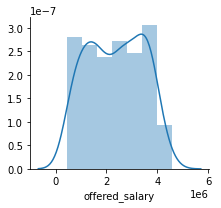

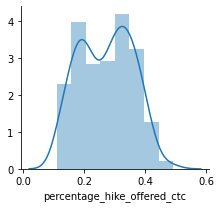

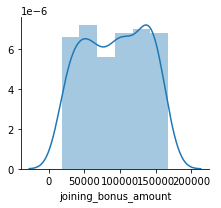

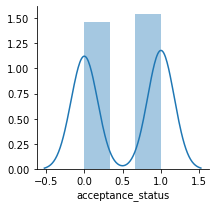

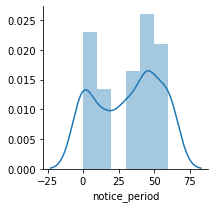

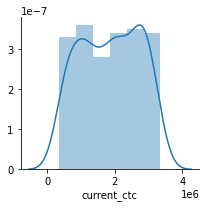

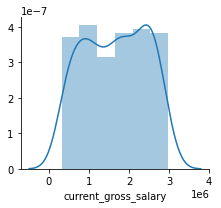

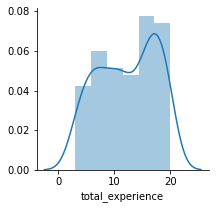

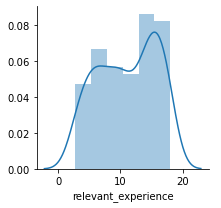

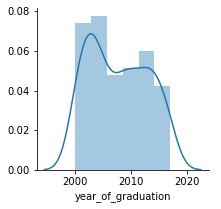

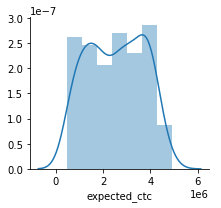

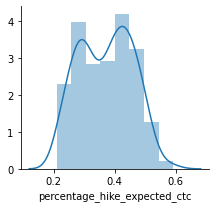

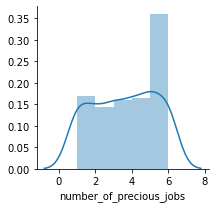

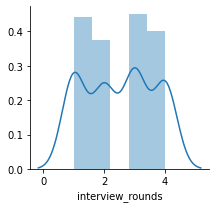

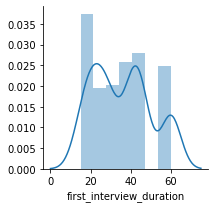

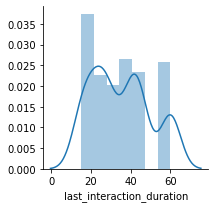

In [32]:
plt.close()

for col in num_cols:
    sns.FacetGrid(data) \
        .map(sns.distplot, col) \
        .add_legend();

plt.show()

# pairplots

# histogram

# Continue Analysis on each of the numerical Values against the target variable acceptance status (histogram , pivot and grouping techniques)

In [35]:
def plot_new_fig(series):
    plt.figure()
    plt.hist(series)
    plt.show()

currently examining the column: offered_salary
Check histogram for Offer Rejected acceptance_status:


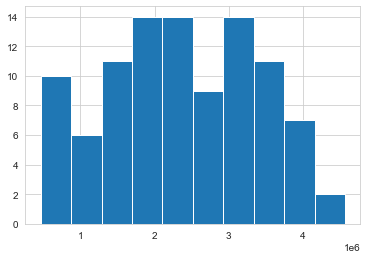

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


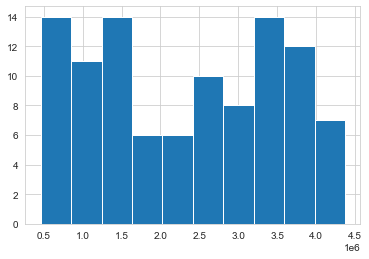

currently examining the column: percentage_hike_offered_ctc
Check histogram for Offer Rejected acceptance_status:


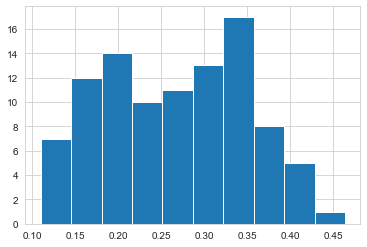

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


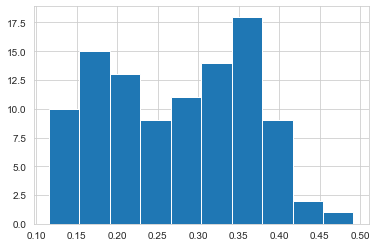

currently examining the column: joining_bonus_amount
Check histogram for Offer Rejected acceptance_status:


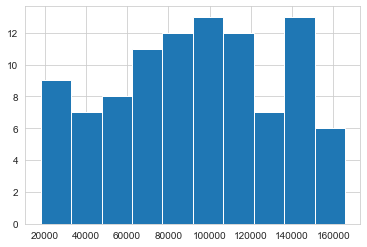

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


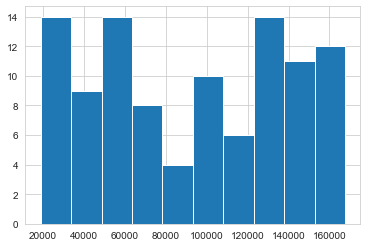

currently examining the column: acceptance_status
Check histogram for Offer Rejected acceptance_status:


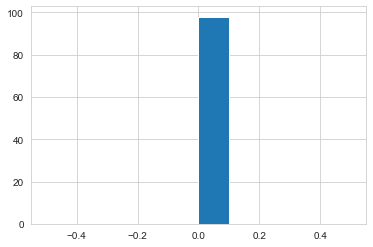

Check histogram for Joined acceptance_status:


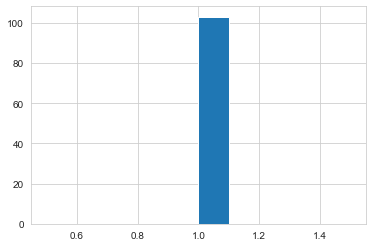

currently examining the column: notice_period
Check histogram for Offer Rejected acceptance_status:


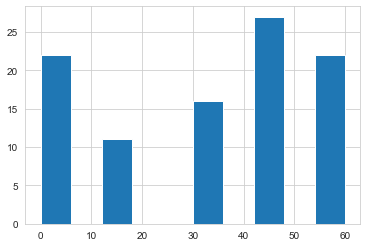

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


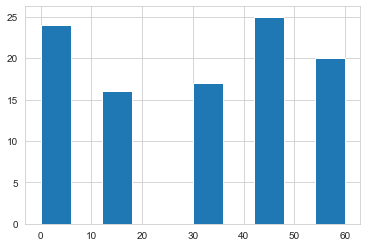

currently examining the column: current_ctc
Check histogram for Offer Rejected acceptance_status:


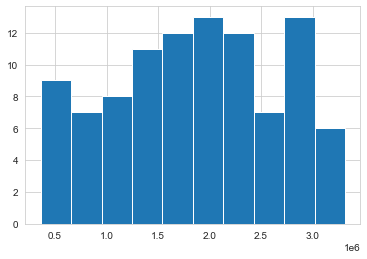

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


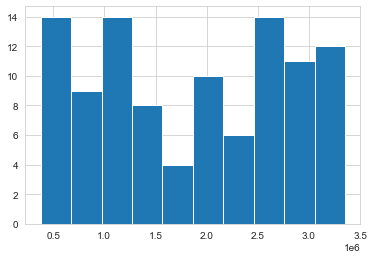

currently examining the column: current_gross_salary
Check histogram for Offer Rejected acceptance_status:


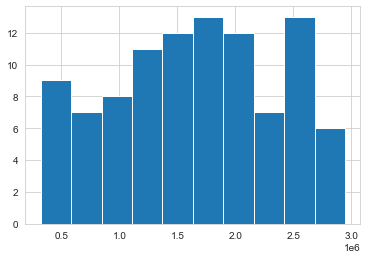

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


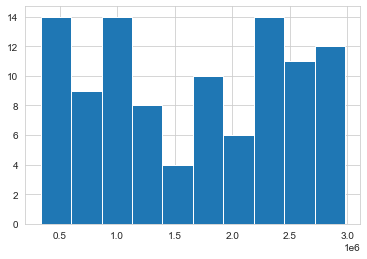

currently examining the column: total_experience
Check histogram for Offer Rejected acceptance_status:


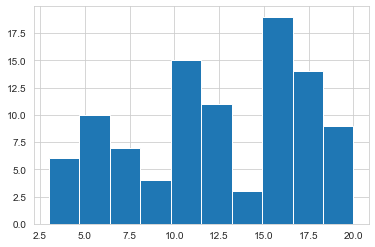

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


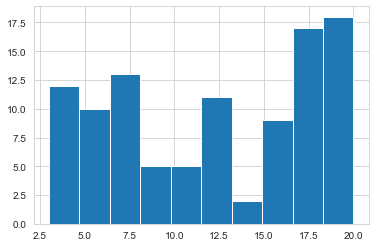

currently examining the column: relevant_experience
Check histogram for Offer Rejected acceptance_status:


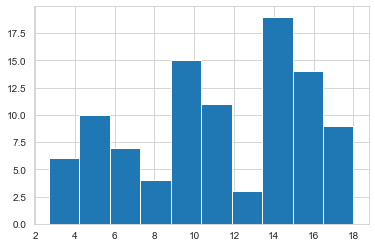

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


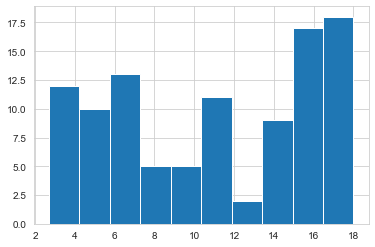

currently examining the column: year_of_graduation
Check histogram for Offer Rejected acceptance_status:


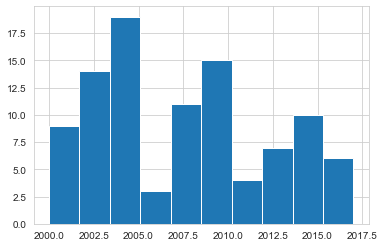

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


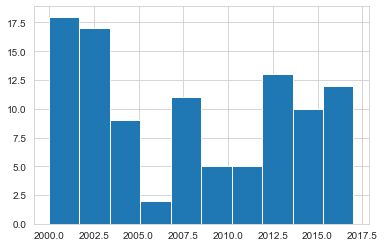

currently examining the column: expected_ctc
Check histogram for Offer Rejected acceptance_status:


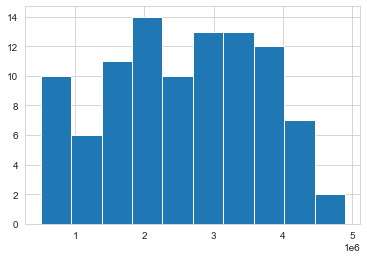

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


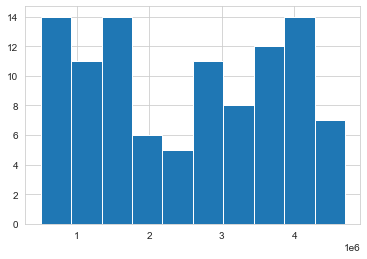

currently examining the column: percentage_hike_expected_ctc
Check histogram for Offer Rejected acceptance_status:


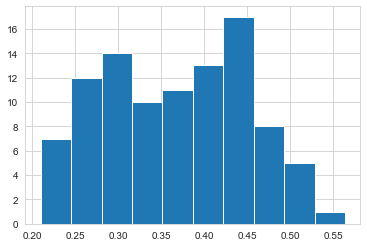

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


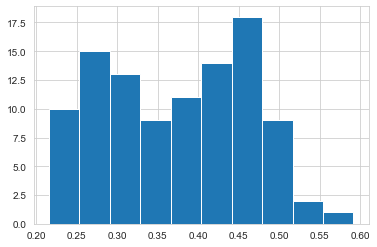

currently examining the column: number_of_precious_jobs
Check histogram for Offer Rejected acceptance_status:


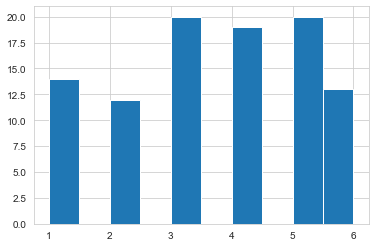

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


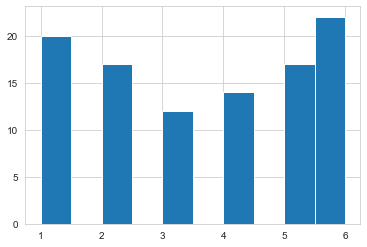

currently examining the column: interview_rounds
Check histogram for Offer Rejected acceptance_status:


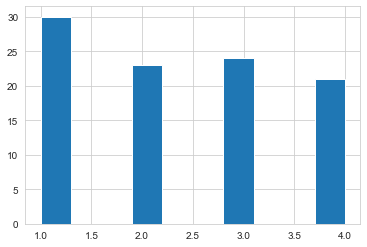

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


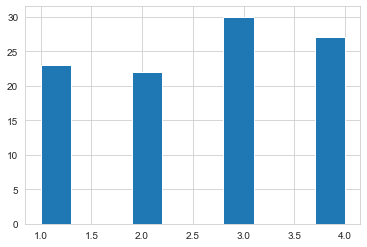

currently examining the column: first_interview_duration
Check histogram for Offer Rejected acceptance_status:


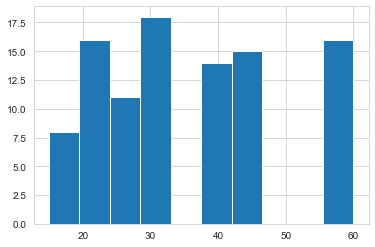

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


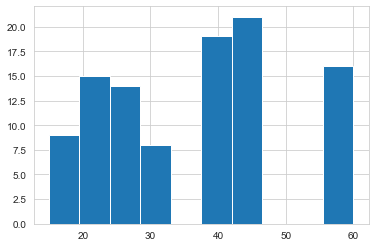

currently examining the column: last_interaction_duration
Check histogram for Offer Rejected acceptance_status:


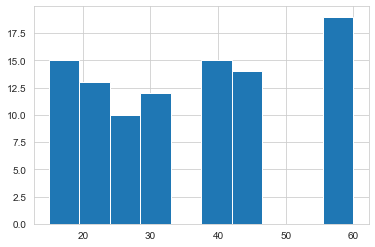

Check histogram for Joined acceptance_status:


C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


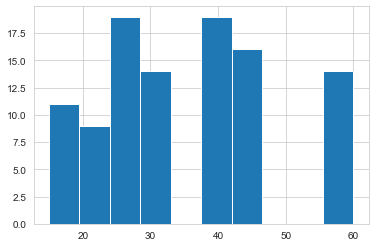

In [39]:
for col in num_cols:
    print("currently examining the column:",col)
    print("Check histogram for Offer Rejected acceptance_status:")
    plot_new_fig(data[data['acceptance_status'] == 0][col])
    print("Check histogram for Joined acceptance_status:")
    plot_new_fig(data[data['acceptance_status'] == 1][col])

# Observations on Numerical features and next steps

#  Analysis on each of the Categorical Values (Data Discretization, binning techniques etc)

In [38]:
# select categorical columns by datatype
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include='object').shape)
num_cat_cols = data.select_dtypes(include=['object'])
num_cat_cols.describe()


Index(['candidate_id', 'offered_band', 'lob', 'joining_location',
       'candidate_relocation_status', 'current_organization',
       'highest_educational_degree', 'gender', 'candidate_source', 'location',
       'interview_types', 'interview_types2'],
      dtype='object')

(201, 12)


,candidate_id,offered_band,lob,joining_location,candidate_relocation_status,current_organization,highest_educational_degree,gender,candidate_source,location,interview_types,interview_types2
count,200,200,200,200,200,200,200,200,200,200,200,200
unique,200,7,3,5,2,15,3,2,3,10,3,3
top,C106,C6,IT,NCR,Yes,Oracle,Bachelors,M,Employee referral,Kolkata,Technical,Written
freq,1,42,120,51,185,21,73,111,72,26,77,72


# Observations on Categorical features and next steps

# Perform Data Normalization (scaling techniques)

# Drop redundant or unnecessary features based on the observations performed above

In [39]:
#Dropping columns such as "Joining location" and "location" cause we already have a column named "Candidate relocation status"(column no.12 ) which gives yes/no
# where "yes" implies columns "Joining location" and "location" are different i.e, it is asking the candidate to relocate
#and "no" implies columns "Joining location" and "location" are same i.e, no neccesary for relocation as joining location and the candidate location is same


data = data.drop(labels= "joining_location",axis = 1)
data = data.drop(labels= "location",axis = 1)

In [40]:
#"Date of interview"(column no.2) is same as "Date of last Interview"(column no.32)
data = data.drop(labels= "date_of_last_interview",axis = 1)


In [41]:
# i suggest we also delete DOB column cause i dont see any way where Date of birth affects the target
# let me know your thoughts



# (D) feature engineering
Feature Engineering is an important step to develop and improve performance of Machine Learning models. these techniques can also be used to identify the variables that impacts the outcome of the model. its basically Process of identifying and extracting the useful(E) model buildingand diagnostics
in this stage first data is divided into train and test data. the subset can also be created using random / stratified sampling procedure. this is important step to measeure the performance of model using dataset not used in model building. it is also essential to check for any overfitting of the model. then model is built using training dataset to estimate the model parameters. the method of classifications can be utilized for the same. 
you have to prepeare a logistic regression model to predict the probablity of a candiate joining the company. assume “OfferRejected” as positive cases and “joined” as negative cases.
find the significant features from the above model and build another logistic regression model with only the significant variables. 
compare the performace of both models using various model attributes and recommend a model that can be used by “HRmagic”
the weigtage for this task will be 5 marks use knowledge of feature selection methods to identify the variables that have greater impact on the outcome. 
ellaborate description of the impact observed is expected as outcome of this step. 
the weigtage for this task will be 6 marks.

# (E) model building and diagnostics
in this stage first data is divided into train and test data. the subset can also be created using random / stratified sampling procedure. this is important step to measeure the performance of model using dataset not used in model building. it is also essential to check for any overfitting of the model. then model is built using training dataset to estimate the model parameters. the method of classifications can be utilized for the same. 
you have to prepeare a logistic regression model to predict the probablity of a candiate joining the company. assume “OfferRejected” as positive cases and “joined” as negative cases.
find the significant features from the above model and build another logistic regression model with only the significant variables. 
compare the performace of both models using various model attributes and recommend a model that can be used by “HRmagic”
the weigtage for this task will be 5 marks